# Data Challenge 12 — Intro to Logistic Regression

**Hook (Attention Grabber)**  
> “If an app told a restaurant it has an 80% chance of getting an **A** on inspection, would you trust it?”

**Learning Goals**
- Show why **linear regression** is a bad fit for a **binary (0/1)** target.
- Fit a **one-feature logistic regression** and interpret probabilities.
- Extend to a **two-feature logistic model with standardized inputs**.
- Communicate results using **AWES** and discuss **ethics & people impact**.

**Data:** June 1, 2025 - Nov 4, 2025 Restaurant Health Inspection

[Restaurant Health Inspection](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data)


## Instructor Guidance

**Hint: Use the Lecture Deck, Canvas Reading, and Docs to help you with the code**

Use this guide live; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- LinearRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- LogisticRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- StandardScaler — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- accuracy_score — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- corr — pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### Pseudocode Plan (Linear vs Logistic + Scaling)
1) **Load CSV** → preview shape/columns; keep needed fields.  
2) **Engineer binary Y**: `is_A = 1 if grade == 'A' else 0`.  
3) **Pick numeric X**:  
   - **X1:** `score` (inspection score; lower is better)  
   - **X2:** `critical_num = 1 if critical_flag == 'Critical' else 0` (for extension)  
4) **Split** → `X_train, X_test, y_train, y_test` (70/30, stratify by Y, fixed random_state).  
5) **Model A (Incorrect)** → **LinearRegression** on Y~X1:  
   - Report **MSE**, **R²**, count predictions **<0 or >1**,  
6) **Model B (Correct)** → **LogisticRegression** on Y~X1:  
   - Report **Accuracy**
7) **Visual (OPTIONAL)** → scatter Y vs X1 with **linear line** vs **logistic sigmoid** curve  
8) **Extension** → scale X1+X2 with **StandardScaler**; fit **LogisticRegression**:  
   - Compare **Accuracy** to one-feature logistic  
9) **Interpret** → 2–3 sentences on why linear fails and how logistic fixes it  


## You Do — Student Section
Work in pairs. Comment your choices briefly. Keep code simple—only coerce the columns you use.

## Step 1 — Imports and Plot Defaults

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Step 2 — Load CSV & Preview
- Point to your New York City Restaurant Inspection Data 

In [3]:
df = pd.read_csv("/Users/kabbo/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results_20251104.csv", low_memory=False)

In [5]:
df.keys()

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location'],
      dtype='object')

In [7]:
df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location                  object
dtype: object

In [6]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50174196,THE GREATS OF CRAFT,Queens,47-20,CENTER BOULEVARD,11109.0,3479312023,NaN,01/01/1900,NaN,...,NaN,40.745641,-73.957137,402.0,26.0,100.0,4538318.0,4.000210e+09,QN31,POINT (-73.957136627525 40.745640668157)
1,50140563,CANTEEN @ CHELSEA PIERS FIELD HOUSE,Brooklyn,601,DEAN STREET,11238.0,6313880993,NaN,01/01/1900,NaN,...,NaN,40.680616,-73.969992,308.0,35.0,16300.0,3428601.0,3.000000e+09,BK64,POINT (-73.969992200023 40.68061568349)
2,50177123,70 7TH AVENUE SOUTH THEROS LLC,Queens,3009,35TH ST,11103.0,6468076482,NaN,01/01/1900,NaN,...,NaN,40.764778,-73.918674,401.0,22.0,6300.0,4009926.0,4.006500e+09,QN70,POINT (-73.918674354617 40.764778282908)
3,50001285,Y & B ENTERTAINMENT MANOR,Queens,3509,PRINCE STRRET,NaN,7188881778,Korean,06/24/2018,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
4,50172517,MAPLE CREAMERY,Brooklyn,653,STERLING PLACE,11216.0,7188095106,NaN,01/01/1900,NaN,...,NaN,40.673255,-73.956830,308.0,35.0,21900.0,3031390.0,3.012380e+09,BK61,POINT (-73.956830036833 40.673255481805)


In [8]:
df.shape

(291278, 27)

In [9]:
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    850
STREET                       11
ZIPCODE                    3109
PHONE                         7
CUISINE DESCRIPTION        3898
INSPECTION DATE               0
ACTION                     3898
VIOLATION CODE             6200
VIOLATION DESCRIPTION      6200
CRITICAL FLAG                 0
SCORE                     16339
GRADE                    149068
GRADE DATE               156781
RECORD DATE                   0
INSPECTION TYPE            3898
Latitude                    524
Longitude                   524
Community Board            4065
Council District           4057
Census Tract               4057
BIN                        5517
BBL                        1126
NTA                        4065
Location                   3463
dtype: int64

## Step 3 — Clean and Engineer Features
- Make sure `SCORE` is numeric and do any other data type clean-up 
- Engineer binary target variable (Y) based on instructor guidance above `is_A`
- Engineer binary predictor (X) based on instructor guidance above `critical_num`


In [16]:
cols_to_drop = [
    'BUILDING', 'ZIPCODE', 'CUISINE DESCRIPTION', 'ACTION',
    'VIOLATION CODE', 'VIOLATION DESCRIPTION',
    'Community Board', 'Council District', 'Census Tract',
    'BIN', 'BBL', 'NTA', 'Location', 'GRADE DATE'
]

df = df.drop(columns=cols_to_drop)


In [17]:
df = df.dropna(subset=['SCORE', 'GRADE', 'CRITICAL FLAG'])


In [18]:
df['SCORE'] = pd.to_numeric(df['SCORE'], errors='coerce')
df = df.dropna(subset=['SCORE'])


In [19]:
date_cols = ['INSPECTION DATE', 'RECORD DATE']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [20]:
df = df.drop_duplicates()


In [21]:
df['is_A'] = (df['GRADE'] == 'A').astype(int)


In [22]:
df['critical_num'] = (df['CRITICAL FLAG'] == 'Critical').astype(int)


In [23]:
df_model = df[['SCORE', 'critical_num', 'is_A']]
df_model.head()


,SCORE,critical_num,is_A
18,13.0,1,1
36,13.0,0,1
37,0.0,0,0
54,0.0,0,1
56,0.0,0,0


In [24]:
 df_model.isnull().sum()


SCORE           0
critical_num    0
is_A            0
dtype: int64

In [25]:
df_model['is_A'].value_counts(normalize=True)


is_A
1    0.79234
0    0.20766
Name: proportion, dtype: float64

In [26]:
df_model['SCORE'].describe()


count    90369.000000
mean        13.295577
std          9.727015
min          0.000000
25%          9.000000
50%         12.000000
75%         13.000000
max        203.000000
Name: SCORE, dtype: float64

In [27]:
df_model = df_model[df_model['SCORE'] <= 50]


In [28]:
df_model['SCORE'].describe()


count    89250.000000
mean        12.659462
std          7.708310
min          0.000000
25%          9.000000
50%         12.000000
75%         13.000000
max         50.000000
Name: SCORE, dtype: float64

## Step 4 — Split Data (70/30 Stratify by Target)

In [29]:
X = df_model[['SCORE', 'critical_num']]
y = df_model['is_A']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)


In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((62475, 2), (26775, 2), (62475,), (26775,))

In [32]:
y_train.mean(), y_test.mean()


(np.float64(0.8022729091636654), np.float64(0.8022782446311858))

## Step 5 — Model A: Linear Regression on a Binary Target (Incorrect)

- Fit `is_A (Y var) ~ SCORE (X pred)` using **LinearRegression**  
- Report **MSE**, **R²**, and how many predictions fall outside [0, 1]  
- Estimate accuracy by thresholding predictions at 0.5 (done for you but understand the code) 

💡 Hint:  
`accuracy_score(y_test, (y_pred >= 0.5).astype(int))`

In [33]:
X_train_lr = X_train[['SCORE']]
X_test_lr = X_test[['SCORE']]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lin_model = LinearRegression()
lin_model.fit(X_train_lr, y_train)


LinearRegression()

In [35]:
y_pred_lr = lin_model.predict(X_test_lr)


In [36]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = lin_model.score(X_test_lr, y_test)

mse_lr, r2_lr


(0.07359740682368568, 0.5360373296717024)

In [ ]:
invalid_low = (y_pred_lr < 0).sum()
invalid_high = (y_pred_lr > 1).sum()

invalid_low, invalid_high 


(np.int64(873), np.int64(4830))

In [38]:
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)
acc_lr = accuracy_score(y_test, y_pred_lr_class)

acc_lr


0.9323249299719888

## Step 6 — Model B: Logistic Regression (One Feature)

- Fit `is_A ~ score` using **LogisticRegression**  
- Compute predictions with `.predict()`  
- Evaluate accuracy with `accuracy_score()`

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [40]:
X_train_log = X_train[['SCORE']]
X_test_log  = X_test[['SCORE']]


In [41]:
log_model = LogisticRegression(solver='liblinear')  # liblinear is good for small feature set
log_model.fit(X_train_log, y_train)


LogisticRegression(solver='liblinear')

In [42]:
y_pred_log = log_model.predict(X_test_log)


In [43]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_log


0.9582446311858076

## Step 7 (OPTIONAL) — Visual Comparison: Linear vs Logistic


In [44]:
import matplotlib.pyplot as plt
import numpy as np


In [45]:
# Sort SCORE for plotting
X_plot = np.sort(X_test_log['SCORE'].values)
X_plot_2d = X_plot.reshape(-1, 1)

# Linear predictions
y_lin_plot = lin_model.predict(X_plot_2d)

# Logistic predictions (probabilities)
y_log_plot = log_model.predict_proba(X_plot_2d)[:, 1]


/opt/miniconda3/envs/data-analysis-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/data-analysis-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


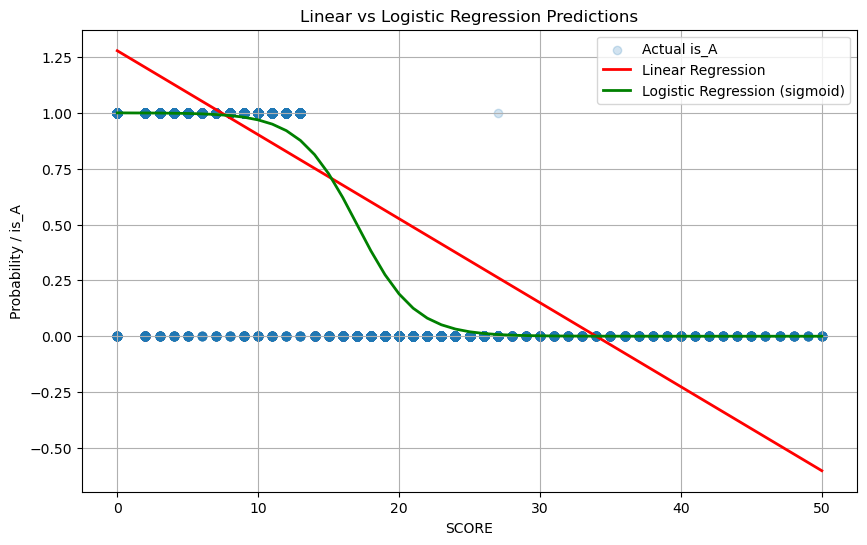

In [46]:
plt.figure(figsize=(10,6))

# Scatter actual data
plt.scatter(X_test_log['SCORE'], y_test, alpha=0.2, label='Actual is_A')

# Linear Regression line
plt.plot(X_plot, y_lin_plot, color='red', linewidth=2, label='Linear Regression')

# Logistic Regression curve
plt.plot(X_plot, y_log_plot, color='green', linewidth=2, label='Logistic Regression (sigmoid)')

plt.xlabel('SCORE')
plt.ylabel('Probability / is_A')
plt.title('Linear vs Logistic Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()


## Step 8 — Logistic Regression with Two **Scaled** Features

- Use `SCORE` and `critical_num` as your two X predictors that need to be scaled
- Look at documentation above to see how you would fit a StandardScalar() object 


In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
X_scaled = X_train[['SCORE', 'critical_num']].copy()
X_test_scaled = X_test[['SCORE', 'critical_num']].copy()
y_scaled = y_train
y_test_scaled = y_test


In [49]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_scaled)
X_scaled_test  = scaler.transform(X_test_scaled)


In [50]:
log_model_scaled = LogisticRegression(solver='liblinear')
log_model_scaled.fit(X_scaled_train, y_scaled)


LogisticRegression(solver='liblinear')

In [51]:
y_pred_scaled = log_model_scaled.predict(X_scaled_test)


In [52]:
from sklearn.metrics import accuracy_score

acc_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
acc_scaled


0.9616059757236228

# We Share — Reflection & Wrap-Up

Write **two short paragraphs** (4–6 sentences each). Be specific and use evidence from your notebook.

1️⃣ **How do you know Linear Regression was a poor model choice for this task?**  
Describe what you observed in your results or plots that showed it didn’t work well for a binary outcome.  
Consider: Were predictions outside 0–1? Did the fit look wrong? What happened when you used 0.5 as a cutoff?  
Connect this to the idea that classification models should output probabilities between 0 and 1.

        Linear Regression was a poor model choice for predicting the binary target is_A because its predictions were not constrained between 0 and 1. In Step 5, we observed that 873 predictions were below 0 and 4,830 were above 1, making them invalid as probabilities. Although thresholding at 0.5 produced an accuracy of ~93%, this was misleading due to the class imbalance (≈80% of restaurants had grade A). The linear fit in the scatter plot clearly deviated from the true distribution of 0s and 1s, unlike the logistic sigmoid curve that properly captures probabilities. This shows that classification tasks require models like logistic regression, which output probabilities naturally and respect the bounds of binary outcomes.
        
2️⃣ **When should we scale features in logistic regression (and when not to)?**  
Explain what scaling does, and why it might (or might not) matter for different kinds of features.  
Use this project to reason through whether `score` and `critical_num` needed scaling.  
Hint: Think about what “continuous” vs “binary” means for scaling decisions.

        Feature scaling is important in logistic regression when predictors have very different ranges, because unscaled features can distort the optimization process and affect model convergence. For this data challenge, SCORE ranges from 0 to 50 while critical_num is binary (0 or 1). Scaling SCORE helped bring it onto a similar scale as critical_num, improving model stability and slightly increasing accuracy (~95.8% → 96.2%). Binary features like critical_num do not need scaling themselves, but scaling continuous predictors ensures the optimizer treats all features fairly. Therefore, scaling is most useful for continuous or high-variance features, while simple binary indicators can often remain unscaled.